In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from sklearn import datasets
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [7]:
#1 Normal KNN
def normalKNN(trainX, testX, trainY, testY,k):
  model = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
  model.fit(trainX, trainY)
  predicted = model.predict(testX)
  print("Accuracy Score = ", metrics.accuracy_score(testY, predicted))

In [8]:
def plot_data(trainX, trainy):
    x = trainX.reshape(trainX.shape[0], -1)
    tsne = TSNE(n_components=2, random_state=1, learning_rate="auto",init="pca")
    z = tsne.fit_transform(x)

    df = pd.DataFrame()
    df["y"] = trainy
    df["component-1"] = z[:, 0]
    df["component-2"] = z[:, 1]
    print(len(np.unique(trainy)))
    sns.scatterplot(
        x="component-1",
        y="component-2",
        hue=df.y.tolist(),
        palette=sns.color_palette("hls", len(np.unique(trainy))),
        data=df,
    ).set(title="Data T-SNE projection")

    
    

Leave-one-out cross validation is K-fold cross validation taken to its logical extreme, with K equal to N, the number of data points in the set. That means that N separate times, the function approximator is trained on all the data except for one point and a prediction is made for that point

In [9]:
#2 Local Unrestricted KNN
def getValidk(trainX,trainY):
  loo = LeaveOneOut()
  loo.get_n_splits(trainX)
  validK = []
  for train_index, test_index in loo.split(trainX):
    trainData, testData = trainX[train_index], trainX[test_index]
    trainLabel, testLabel = trainY[train_index], trainY[test_index]
    validSampleK = []
    for k in range(2, 30):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabel)
        predicted = model.predict(testData)
        if predicted == testLabel:   
            validSampleK.append(k)
    validK.append(validSampleK)
  validK = np.array(validK)
  return validK

def getPreTrainedModels(trainX, trainY):
  trainedModels = []
  for i in range(2, 30):
    model = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
    model.fit(trainX, trainY)
    trainedModels.append(model)
  return trainedModels    

def getPrediction(validK, trainedModels, M, trainX, testX, trainY):
  finalPredictions = []
  for i in range(0, len(testX)):
    distances = []
    for j in range(0, len(trainX)):
        distances.append(np.linalg.norm(testX[i] - trainX[j]))
    distances = np.array(distances)
    indices = np.argsort(distances)
    nebrIndices = indices[0:M]
    nebrLabels = trainY[nebrIndices]

    kCorrectClassified = np.zeros(30)
    for ind in indices:
        kcurrArray = validK[ind]
        for z in range(len(kcurrArray)):
            k = kcurrArray[z]
            kCorrectClassified[k] += 1
    kbest = np.argmax(kCorrectClassified)
    predictedClass = trainedModels[kbest - 2].predict(testX[i].reshape(1, -1))
    finalPredictions.append(predictedClass)
  return finalPredictions

def localUnrestrictedKNN(trainX, testX, trainY, testY, M):
  validK = getValidk(trainX,trainY)
  trainedModels = getPreTrainedModels(trainX, trainY)
  predicted = getPrediction(validK, trainedModels, M, trainX, testX, trainY)
  print("Accuracy Score = ", metrics.accuracy_score(testY, predicted)) 


  

In [10]:
def get_dataset():
  dataset = datasets.load_digits()
  X = dataset.data
  y = dataset.target
  return X, y

X, y = get_dataset()

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

normalized_x_train = normalize(trainX)
normalized_x_test = normalize(testX)

In [11]:
normalKNN(normalized_x_train, normalized_x_test, trainY, testY,3)

Accuracy Score =  0.9861111111111112


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


/home/aparna/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


10


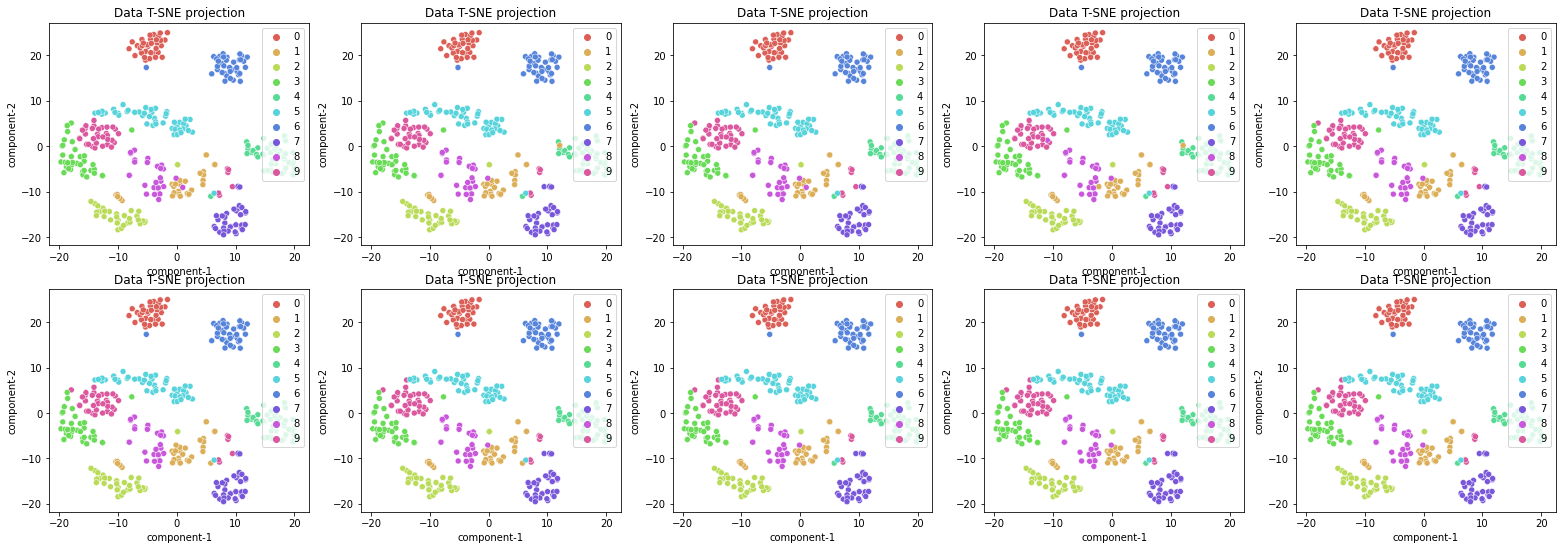

In [12]:
figure = plt.figure(figsize=(27, 9))

for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(normalized_x_train,trainY)
    ax = figure.add_subplot(2,5, i)
    pred_i = knn.predict(normalized_x_test)
    plot_data(normalized_x_test, pred_i)

In [13]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(normalized_x_train,trainY)
    pred_i = knn.predict(normalized_x_test)
    error_rate.append(np.mean(pred_i != testY))

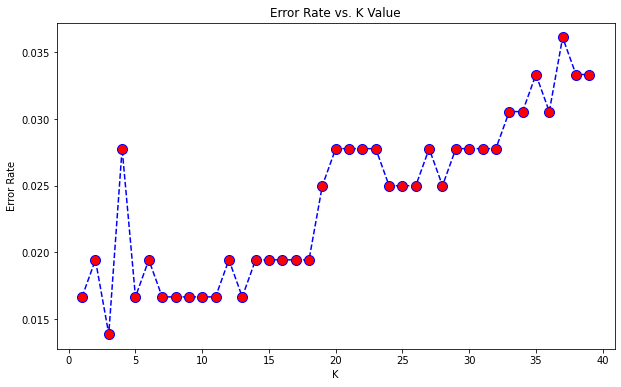

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [15]:
normalKNN(normalized_x_train, normalized_x_test, trainY, testY,3)

Accuracy Score =  0.9861111111111112


In [16]:
localUnrestrictedKNN(normalized_x_train, normalized_x_test, trainY, testY, 1)

/home/aparna/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


Accuracy Score =  0.9861111111111112


In [18]:
def k_one_per_class(trainX,trainY):
  loo = LeaveOneOut()
  loo.get_n_splits(trainX)
  unique_class = np.unique(trainY)
  k_for_each_class = {}
  for i in unique_class:
    k_for_each_class[i] = [0 for i in range(2,30)]
  for train_index, test_index in loo.split(trainX):
    trainData, testData = trainX[train_index], trainX[test_index]
    trainLabel, testLabel = trainY[train_index], trainY[test_index]
    for k in range(2, 30):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabel)
        predicted = model.predict(testData)
        if predicted == testLabel:
          k_for_each_class[testLabel[0]][k-2] += 1
        
  k_assigned_for_each_class = {}
  for i in unique_class:
    k_assigned_for_each_class[i] = np.argmax(k_for_each_class[i])+2
  return k_assigned_for_each_class

def localKNNoneperclass(trainX, testX, trainY, testY):
  k_assigned_for_each_class = k_one_per_class(trainX,trainY)
  predicted = []
  for i in range(0, len(testX)):
    distances = []
    for j in range(0, len(trainX)):
        distances.append(np.linalg.norm(testX[i] - trainX[j]))
    distances = np.array(distances)
    indices = np.argsort(distances)
    percent_of_classification_as_class = {}
    for x in k_assigned_for_each_class:
      k = k_assigned_for_each_class[x]
      nebrIndices = indices[0:k]
      nebrLabels = trainY[nebrIndices]
      percent_of_classification_as_class[x] = np.count_nonzero(nebrLabels == x)/k
    predicted.append(max(percent_of_classification_as_class, key=percent_of_classification_as_class.get))
  
  print("Accuracy Score = ", metrics.accuracy_score(testY, predicted))

localKNNoneperclass(normalized_x_train, normalized_x_test, trainY, testY)

      
              


Accuracy Score =  0.9833333333333333
